# Concepts & Topics ML with Sciky-Learn

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline 

## PCA

<p align="center">
  <img src="./img/PCA.png" width="600" title="PCA">
</p>

### Load Dataset 

In [2]:
dt_heart = pd.read_csv('./data/heart.csv')
dt_heart.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
618,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
717,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


### Separate features and target in different datasets

In [3]:
dt_features =  dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

### Normalize

In [4]:
dt_features = StandardScaler().fit_transform(dt_features)

### The dataset is separated into a training set and a test set

In [5]:
x_train,x_test,y_train,y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [6]:
print(x_train.shape)
print(y_train.shape)

(717, 13)
(717,)


### Apply Principal Component Analysis

In [7]:
# n_components = min(n_muestras, n_feactures)
pca = PCA(n_components=3)
pca.fit(x_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(x_train)

IncrementalPCA(batch_size=10, n_components=3)

### Plot the principal components and their contribution

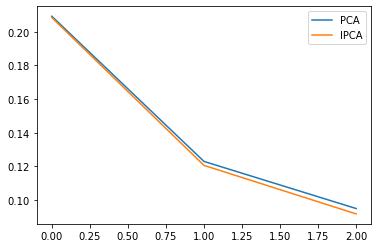

In [8]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_,
         range(len(ipca.explained_variance_)), ipca.explained_variance_ratio_)
plt.legend(['PCA','IPCA'])
plt.show()

### Configure Regression and analyze models

In [9]:
logistic = LogisticRegression(solver='lbfgs')

In [10]:
dt_train = pca.transform(x_train)
dt_test = pca.transform(x_test)
logistic.fit(dt_train, y_train)
print('Score PCA: ', logistic.score(dt_test, y_test))

Score PCA:  0.7857142857142857


In [11]:
dt_train = ipca.transform(x_train)
dt_test = ipca.transform(x_test)
logistic.fit(dt_train, y_train)
print('Score IPCA: ', logistic.score(dt_test, y_test))

Score IPCA:  0.8051948051948052


## KERNELS

<p align="center">
  <img src="./img/kernelPCA.png" width="900" title="Kernel PCA">
</p>

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(x_train)

KernelPCA(kernel='poly', n_components=4)

In [14]:
dt_train = kpca.transform(x_train)
dt_test = kpca.transform(x_test)
logistic = LogisticRegression(solver='lbfgs')

In [15]:
logistic.fit(dt_train, y_train)
print('Score KPCA: ', logistic.score(dt_test,y_test))

Score KPCA:  0.7987012987012987


## Regularization

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error

### Load Dataset

In [17]:
felicidad_df = pd.read_csv('./data/felicidad.csv')
felicidad_df.sample(3)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
94,Nigeria,95,5.074,5.209500,4.938500,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391
129,Sudan,130,4.139,4.345747,3.932253,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,1.687066
100,South Africa,101,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909


In [18]:
X =  felicidad_df[['gdp','family','lifexp','freedom','corruption', 'generosity','dystopia']]
y =  felicidad_df['score']

In [19]:
print(X.shape)
print(y.shape)

(155, 7)
(155,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Recordando que :

<ul> 
    <li>Ninguna de las dos es mejor que la otra para todos los casos.
    <li>Lasso envía algunos coeficientes a cero permitiendo así seleccionar variables significativas para el modelo.
    <li>Lasso funciona mejor si tenemos pocos predictores que influyen sobre el modelo.
    <li>Ridge funciona mejor si es el caso contrario y tenemos una gran cantidad.
</ul>

In [21]:
modelLinear = LinearRegression().fit(X_train, y_train)
y_predict_linear =  modelLinear.predict(X_test)

In [22]:
modelLasso = Lasso(alpha=0.02).fit(X_train, y_train)
y_predict_lasso =  modelLasso.predict(X_test)

In [23]:
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
y_predict_ridge =  modelRidge.predict(X_test)

In [24]:
linear_loss = mean_absolute_error(y_test, y_predict_linear)
lasso_loss = mean_absolute_error(y_test, y_predict_lasso)
ridge_loss = mean_absolute_error(y_test, y_predict_ridge)

In [25]:
print('Linear Loss:',linear_loss, ', Lasso Loss:', lasso_loss, ', Ridge Loss:', ridge_loss)

Linear Loss: 0.00023766072112967442 , Lasso Loss: 0.15007205364007076 , Ridge Loss: 0.0516466209781303


In [26]:
print('Coeficient Lasso:', modelLinear.coef_)
print('Coeficient Lasso:', modelLasso.coef_)
print('Coeficient Ridge:', modelRidge.coef_)

Coeficient Lasso: [1.00013536 0.99992043 0.9998032  0.99991777 0.99984817 1.00008604
 0.99994363]
Coeficient Lasso: [1.33081999 0.85324128 0.51649577 0.71833439 0.         0.26806119
 0.96099623]
Coeficient Ridge: [1.08566484 0.95041369 0.87056928 0.88264857 0.63796465 0.76902573
 0.97846985]


### Regularización ElasticNet

Es común encontrarnos en la literatura con un camino intermedio llamado ElasticNet. Esta técnica consiste en combinar las dos penalizaciones anteriores en una sola función. Así, nuestra ecuación de optimización quedará:

Donde tenemos ahora un parámetro adicional 𝛂 que tiene un rango de valores entre 0 y 1. Si 𝛂 = 0 , ElasticNet se comportará como Ridge, y si 𝛂 = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

<ul>
    <li>Tenemos una forma de probar ambas L1 y L2 al tiempo sin perder información.
    <li>Supera las limitaciones individuales de ellas.
    <li>Si hace falta experiencia, o el conocimiento matemático de fondo, puede ser la opción preferente para probar la regularización.
</ul>


In [27]:
from sklearn.linear_model import ElasticNet

In [28]:
modelElastic = ElasticNet(random_state=0).fit(X, y)
y_predict_Elas =  modelElastic.predict(X_test)

In [29]:
Elastic_loss = mean_absolute_error(y_test, y_predict_Elas)
print('Elastic Loss:',Elastic_loss)

Elastic Loss: 0.9558732717518612


## Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

### How to identify them?

### Z-Score
Is also known as **standard score** gives us an idea of how far a data point is from the mean. It indicates how many standard deviations an element is from the mean. Hence, Z-Score is measured in terms of standard deviation from the mean. For example, a standard deviation of 2 indicates the value is 2 standard deviations away from the mean. In order to use a z-score, we need to know the population mean (μ) and also the population standard deviation (σ). 

A z-score can be calculated using the following formula. 
 
    z = (X – μ) / σ
where, 
z = Z-Score   
X = The value of the element   
μ = The population mean  
σ = The population standard deviation 

<p align="center">
      <img src="./img/z-score.png" width="600" title="Outliers">
</p>

### Quartiles
The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQR.
<p align="center">
  <img src="./img/boxplot.png" width="600" title="Outliers">
</p>

### DBSCAN:     _Density-Based Spatial Clustering of Applications with Noise_
**A density-based unsupervised algorithm**, it takes multi-dimensional data as inputs and clusters them according to the model parameters — e.g. epsilon and minimum samples. Based on these parameters, the algorithm determines whether certain values in the dataset are outliers or not.
<p align="center">
  <img src="./img/DBSCAN.png" width="500" title="Outliers">
</p>

## Robust Regression

### RANSAC:  random sample Consensus
Selects a random sample of the data assuming that this sample is within the inliners values, with these data the model is trained and its behavior compared with the other data. This procedure is repeated as many times as indicated and at the end of the algorithm it chooses the combination of data that has the best number of inliners, where the outliers can be effectively discriminated.
<p align="center">
    <img src="./img/ransac1.png" width="600" title="RANSAC">
</p>

### Huber Reggresor
No elimina los valores atípicos sino que los penaliza. Realiza el entrenamiento y si el error absoluto de la perdida alcanza cierto umbral (epsilon) los datos son tratados como atípicos. El valor por defecto de epsilon es 1.35 ya que se ha demostrado que logra un 95% de eficiencia estadística.

In [30]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR

In [31]:
felicidad_df = pd.read_csv('./data/felicidad.csv')
felicidad_df.sample(3)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
41,Malaysia,42,6.084,6.179980,5.988021,1.291215,1.284646,0.618784,0.402265,0.416609,0.065601,2.004449
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [32]:
X =  felicidad_df.drop(['country', 'score'], axis=1)
y =  felicidad_df['score']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
stimators = {'SVR':SVR(gamma='auto',C=1.0, epsilon=0.1),
            'RANSAC': RANSACRegressor(),
            'HUBER': HuberRegressor(epsilon=1.35)}

****************************************************************
SVR
MSE: 0.13027953232268732


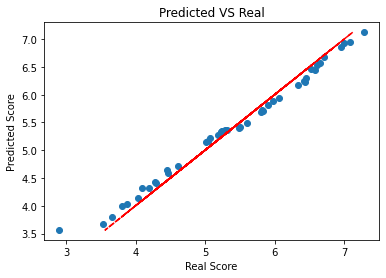

****************************************************************
RANSAC
MSE: 2.5535051142113884e-10


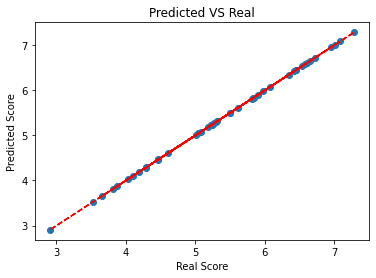

****************************************************************
HUBER
MSE: 0.0009279514955578373


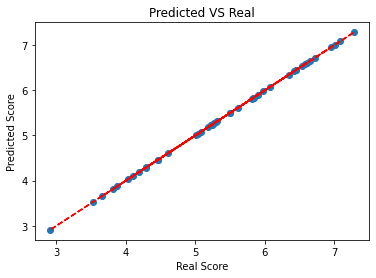

In [35]:
import warnings
warnings.simplefilter("ignore")

for name, stimator in stimators.items():
    stimator.fit(X_train,y_train)
    predictions = stimator.predict(X_test)
    print('*'*64)
    print(name)
    print('MSE:', mean_absolute_error(y_test,predictions))
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()

## Assembly Methods

Ensemble is a Machine Learning concept in which the idea is to train multiple models using the same learning algorithm. The ensembles take part in a bigger group of methods, called multiclassifiers, where a set of hundreds or thousands of learners with a common objective are fused together to solve the problem.  

The main causes of error in learning are due to noise, bias and variance. Ensemble helps to minimize these factors. These methods are designed to improve the stability and the accuracy of Machine Learning algorithms. Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier.

To use Bagging or Boosting you must select a base learner algorithm. For example, if we choose a classification tree, Bagging and Boosting would consist of a pool of trees as big as we want. 

<p align="center">
  <img src="./img/ens1.png" width="600" title="Assembly methods">
  <img src="./img/ens2.png" width="600" title="Assembly methods">
  <img src="./img/ens3.png" width="600" title="Assembly methods">
  <img src="./img/ens4.png" width="600" title="Assembly methods">
  <img src="./img/ens5.png" width="600" title="Assembly methods">
</p>


`Source` : <https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/>

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score

In [37]:
dt_heart = pd.read_csv('./data/heart.csv')
dt_heart.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
198,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [38]:
X = dt_heart.drop(['target'], axis=1)
y = dt_heart['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

### Bagging

In [40]:
knn_class = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn_class.predict(X_test)
print(accuracy_score(knn_predict, y_test))

0.7214484679665738


In [41]:
bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50).fit(X_train,y_train)
bag_predict = bag_class.predict(X_test)
print(accuracy_score(bag_predict, y_test))

0.7576601671309192


### Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
boost_class = GradientBoostingClassifier(n_estimators=50).fit(X_train,y_train)
boost_predict = boost_class.predict(X_test)
print(accuracy_score(boost_predict, y_test))

0.9220055710306406


## Clustering

Clustering algorithms are the strategies that we can use to group data in such a way that all the data belonging to a group are as similar as possible to each other, and as different as possible from other groups.

Clustering application cases.
<ul>
    <li> We were previously unaware of our data labels (Unsupervised Learning). 
    <li> We want to discover hidden patterns with the naked eye. 
    <li> We want to identify outliers.
</ul>

<p align="center">
  <img src="./img/cluster_comparison.png" width="800" title="Outliers">
</p>



If we know **k**  
we will use **K-means** or **Spectral Clustering**

If we don't know **k**  
we will use **Meanshift**, **Clustering jerarquico** or **DBScan**
    

`Source` : <https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/>

### K-means

In [44]:
from sklearn.cluster import MiniBatchKMeans

In [45]:
candy_df = pd.read_csv('./data/candy.csv')
print(len(candy_df))
candy_df.head(4)

85


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505


In [46]:
X = candy_df.drop(['competitorname'], axis=1)

In [47]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)
print('Total Clusters:', len(kmeans.cluster_centers_))

Total Clusters: 4


In [48]:
print(kmeans.predict(X))

[1 1 3 0 2 2 2 3 0 3 0 0 3 0 0 0 0 0 2 3 2 0 2 2 2 2 3 2 1 0 0 2 1 1 0 2 1
 2 1 2 2 2 1 1 3 0 0 1 0 0 0 1 1 1 1 3 1 3 0 3 2 2 0 0 1 2 2 2 1 3 3 3 3 2
 2 0 0 2 0 1 0 0 0 0 2]


In [49]:
candy_df['kmeans'] = kmeans.predict(X)
candy_df.sample(4)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,kmeans
21,Haribo Twin Snakes,0,1,0,0,0,0,0,0,1,0.465,0.465,42.178772,0
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046,2
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,3
29,Laffy Taffy,0,1,0,0,0,0,0,0,0,0.220,0.116,41.389557,0


### Mean-Shift

In [50]:
from sklearn.cluster import MeanShift

In [51]:
meanshift = MeanShift().fit(X)
print('Total Clusters:', max(meanshift.labels_))

Total Clusters: 2


In [52]:
print(meanshift.labels_)

[2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]


In [53]:
print(meanshift.cluster_centers_)

[[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


In [54]:
candy_df['meanshift'] = meanshift.labels_
candy_df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,kmeans,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,3,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,1
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,2,1
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,2,1
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,3,0
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0,0
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,3,0


## Parametric Optimization

### Hold Out

<ul>
    <li> We do not have much knowledge
    <li> We want rapid prototypes
    <li> We have no computing power.
</ul>

<p align="center">
  <img src="./img/holdout.jpg" width="500" title="Outliers">
</p>


### K-fold: Cross Validation

<ul>
    <li> Recommended in most cases.
    <li> There is a sufficient team to develop ML.
    <li> Integration with parametric optimization techniques is required.
    <li> You have more time for testing.
</ul>

<p align="center">
  <img src="./img/K-fold_cross_validation.jpg" width="500" title="Outliers">
</p>

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [57]:
felicidad_df = pd.read_csv('./data/felicidad.csv')
felicidad_df.head(5)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [70]:
X = felicidad_df.drop(['score','country'], axis=1)
y = felicidad_df['score']

In [71]:
model = DecisionTreeRegressor()
score = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
print(np.abs(np.mean(score)))

0.5555586884261041


In [91]:
# Cross Validation

mse_values = []

kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train,test in kf.split(X):
    
    X_train = pd.DataFrame(columns=list(X),index=range(len(train)))
    X_test = pd.DataFrame(columns=list(X),index=range(len(test)))
    
    y_train = pd.DataFrame(columns=['score'],index=range(len(train)))
    y_test = pd.DataFrame(columns=['score'],index=range(len(test)))
    
    for i in range(len(train)):
        X_train.iloc[i] = X.iloc[train[i]]
        y_train.iloc[i] = y.iloc[train[i]]
    for j in range(len(test)):
        X_test.iloc[j] = X.iloc[test[j]]
        y_test.iloc[j] = y.iloc[test[j]]
        
    model = DecisionTreeRegressor().fit(X_train,y_train)
    predict = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test,predict))

print("Los tres MSE fueron: ",mse_values)
print("El MSE promedio fue: ", np.mean(mse_values))

Los tres MSE fueron:  [0.006362268713187513, 0.004804167839378178, 0.005590139331215028]
El MSE promedio fue:  0.005585525294593573


### LOOCV

<ul>
    <li> It has great computing power
    <li> There is little data to be able to divide by Train / Test
    <li> When you want to test all possible cases (for people with OCD)
</ul>

<p align="center">
  <img src="./img/loocv.png" width="500" title="loocv">
</p>

### Hyperparameter Optimization

Scikit Learn offers us approaches to automate the parametric optimization process. There are 3 main approaches, these are:
<ul>
    <li> Manual optimization
    <li> Optimization by parameter grid | GridSearchCV.
    <li> Randomized search optimization
</ul>


**Manual optimization**

<ol>
    <li> Choose the model that we want to adjust. 
    <li> Search the Scikit-Learn documentation 
    <li> Identify parameters and settings. Parameters that we are going to need and what are the possible adjustments that we are going to require for each of these parameters.
    <li> Test combinations one by one by iterating through lists.
</ol>

**Optimization by parameter grid | GridSearchCV**

It is an organized, exhaustive and systematic way of testing all the parameters that we tell you to test, with the respective ranges of values that we provide.

<ol>
    <li> Define one or more metrics that we want to optimize.
    <li> Identify the possible values that the parameters may have.
    <li> Create a parameter dictionary.
    <li> Use Cross Validation.
    <li>Train the model (and go for a coffee)
</ol>

The grid of parameters defines GROUPS OF PARAMETERS that will be tested in all their combinations (One group at a time)

<p align="center">
  <img src="./img/gridsearch.png" width="600" title="gridsearch">
</p>




**Randomized search optimization | RandomizedSearchCV**  
If we do not have so much time for such an exhaustive test or we want random combinations we will use this method. It is the same as the previous case, but it randomly searches the parameters and Scikit Learn selects the best of the random combinations that were made.

In this method, we define value scales for each of the selected parameters, the system will test several iterations (Configurable according to resources) and show the best combination found.

<p align="center">
  <img src="./img/gridvsrandom.png" width="600" title="gridvsrandom">
</p>

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [95]:
felicidad_df = pd.read_csv('./data/felicidad.csv')
felicidad_df.head(5)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [97]:
X = felicidad_df.drop(['score','country', 'rank'], axis=1)
y = felicidad_df['score']

In [94]:
reg = RandomForestRegressor()

In [100]:
param = {
    'n_estimators': range(4,16),
    'criterion': ['mse', 'mae'],
    'max_depth': range(2,11)
    }
rand_est =  RandomizedSearchCV(reg, param, n_iter=10, cv=3, scoring='neg_mean_absolute_error').fit(X, y)

In [101]:
print(rand_est.best_estimator_)

RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=4)


In [104]:
print(rand_est.best_score_)

-0.6065381981725427


In [103]:
print(rand_est.predict(X.loc[[0]]))

[7.50174987]
